# Exploratory Data Analysis

### https://www.kaggle.com/anokas/exploratory-data-analysis-4

### https://www.kaggle.com/c/data-science-bowl-2017#resources

In [1]:
!ls -l NEW_input/

total 136
-rw-r--r--   1 cesare.chung  staff  10504 11 29 21:46 naive_submission.csv
drwxr-xr-x   2 cesare.chung  staff     68 11 29 15:50 prepd_samples
drwxr-xr-x  22 cesare.chung  staff    748 11 29 15:49 sample_images
drwxr-xr-x   2 cesare.chung  staff     68 11 29 15:50 sample_masks
-rw-r--r--@  1 cesare.chung  staff  48905  1 12  2017 stage1_labels.csv
-rw-r--r--@  1 cesare.chung  staff   7336  1 12  2017 stage1_sample_submission.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
p = sns.color_palette()

os.listdir('NEW_input/')

['.DS_Store',
 'naive_submission.csv',
 'prepd_samples',
 'sample_images',
 'sample_masks',
 'stage1_labels.csv',
 'stage1_sample_submission.csv']

### The image data


In [3]:
for d in os.listdir('NEW_input/sample_images/'):
    print("Patient '{}' has {} scans".format(d, len(os.listdir('NEW_input/sample_images/' + d))))
print('----')
print('Total patients {} Total DCM files {}'.format(len(os.listdir('NEW_input/sample_images/')), 
                                                     len(glob.glob('NEW_input/sample_images/*/*.dcm'))))

Patient '00cba091fa4ad62cc3200a657aeb957e' has 134 scans
Patient '0a099f2549429d29b32f349e95fb2244' has 128 scans
Patient '0a0c32c9e08cc2ea76a71649de56be6d' has 133 scans
Patient '0a38e7597ca26f9374f8ea2770ba870d' has 110 scans
Patient '0acbebb8d463b4b9ca88cf38431aac69' has 203 scans
Patient '0b20184e0cd497028bdd155d9fb42dc9' has 196 scans
Patient '0bd0e3056cbf23a1cb7f0f0b18446068' has 280 scans
Patient '0c0de3749d4fe175b7a5098b060982a1' has 123 scans
Patient '0c37613214faddf8701ca41e6d43f56e' has 164 scans
Patient '0c59313f52304e25d5a7dcf9877633b1' has 244 scans
Patient '0c60f4b87afcb3e2dfa65abbbf3ef2f9' has 136 scans
Patient '0c98fcb55e3f36d0c2b6507f62f4c5f1' has 180 scans
Patient '0c9d8314f9c69840e25febabb1229fa4' has 221 scans
Patient '0ca943d821204ceb089510f836a367fd' has 147 scans
Patient '0d06d764d3c07572074d468b4cff954f' has 435 scans
Patient '0d19f1c627df49eb223771c28548350e' has 183 scans
Patient '0d2fcf787026fece4e57be167d079383' has 126 scans
Patient '0d941a3ad6c889ac451caf

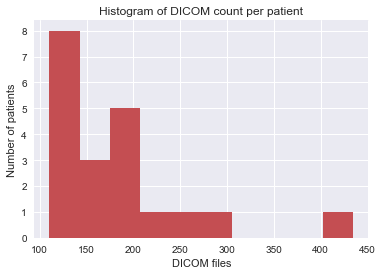

In [4]:
patient_sizes = [len(os.listdir('NEW_input/sample_images/' + d)) for d in os.listdir('NEW_input/sample_images/')]
plt.hist(patient_sizes, color=p[2])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient')

In [5]:
sizes = [os.path.getsize(dcm)/1000000 for dcm in glob.glob('NEW_input/sample_images/*/*.dcm')]
print('DCM file sizes: min {:.3}MB max {:.3}MB avg {:.3}MB std {:.3}MB'.format(np.min(sizes), 
                                                       np.max(sizes), np.mean(sizes), np.std(sizes)))


DCM file sizes: min 0.525MB max 0.526MB avg 0.525MB std 3.74e-05MB


In [6]:
df_train = pd.read_csv('NEW_input/stage1_labels.csv')
df_train.head()

,id,cancer
0,0015ceb851d7251b8f399e39779d1e7d,1
1,0030a160d58723ff36d73f41b170ec21,0
2,003f41c78e6acfa92430a057ac0b306e,0
3,006b96310a37b36cccb2ab48d10b49a3,1
4,008464bb8521d09a42985dd8add3d0d2,1


In [7]:
print('Number of training patients: {}'.format(len(df_train)))
print('Cancer rate: {:.4}%'.format(df_train.cancer.mean()*100))

Number of training patients: 1397
Cancer rate: 25.91%


In [8]:
from sklearn.metrics import log_loss
logloss = log_loss(df_train.cancer, np.zeros_like(df_train.cancer) + df_train.cancer.mean())
print('Training logloss is {}'.format(logloss))

Training logloss is 0.5721414894789518


In [9]:
sample = pd.read_csv('NEW_input/stage1_sample_submission.csv')
sample.head()

,id,cancer
0,026470d51482c93efc18b9803159c960,0.5
1,031b7ec4fe96a3b035a8196264a8c8c3,0.5
2,03bd22ed5858039af223c04993e9eb22,0.5
3,06a90409e4fcea3e634748b967993531,0.5
4,07b1defcfae5873ee1f03c90255eb170,0.5


In [10]:
sample = pd.read_csv('NEW_input/stage1_sample_submission.csv')
sample['cancer'] = df_train.cancer.mean()
sample.to_csv('NEW_input/naive_submission.csv', index=False)

In [11]:
df = pd.read_csv('NEW_input/naive_submission.csv')
df.head()

,id,cancer
0,026470d51482c93efc18b9803159c960,0.259127
1,031b7ec4fe96a3b035a8196264a8c8c3,0.259127
2,03bd22ed5858039af223c04993e9eb22,0.259127
3,06a90409e4fcea3e634748b967993531,0.259127
4,07b1defcfae5873ee1f03c90255eb170,0.259127


In [12]:
df_train.cancer.mean()

0.25912670007158195

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


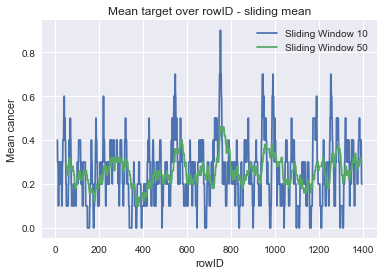

In [13]:
targets = df_train['cancer']
plt.plot(pd.rolling_mean(targets, window=10), label='Sliding Window 10')
plt.plot(pd.rolling_mean(targets, window=50), label='Sliding Window 50')
plt.xlabel('rowID')
plt.ylabel('Mean cancer')
plt.title('Mean target over rowID - sliding mean')
plt.legend()

In [14]:
print('Accuracy predicting no cancer: {}%'.format((df_train['cancer'] == 0).mean()))
print('Accuracy predicting with last value: {}%'.format((df_train['cancer'] == df_train['cancer'].shift()).mean()))

Accuracy predicting no cancer: 0.740873299928418%
Accuracy predicting with last value: 0.6148890479599141%


### Test set


In [15]:
sample = pd.read_csv('NEW_input/stage1_sample_submission.csv')
sample.head()

,id,cancer
0,026470d51482c93efc18b9803159c960,0.5
1,031b7ec4fe96a3b035a8196264a8c8c3,0.5
2,03bd22ed5858039af223c04993e9eb22,0.5
3,06a90409e4fcea3e634748b967993531,0.5
4,07b1defcfae5873ee1f03c90255eb170,0.5


In [16]:
print('The test file has {} patients'.format(len(sample)))

The test file has 198 patients


### DICOMs

In [17]:
import dicom

In [18]:
dcm = 'NEW_input/sample_images/0a38e7597ca26f9374f8ea2770ba870d/4ec5ef19b52ec06a819181e404d37038.dcm'
print('Filename: {}'.format(dcm))
dcm = dicom.read_file(dcm)

Filename: NEW_input/sample_images/0a38e7597ca26f9374f8ea2770ba870d/4ec5ef19b52ec06a819181e404d37038.dcm


In [19]:
dcm

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.160978843216949953815246551971491067836
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '0a38e7597ca26f9374f8ea2770ba870d'
(0010, 0020) Patient ID                          LO: '0a38e7597ca26f9374f8ea2770ba870d'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.13148394979245937484165594540025668927189308811493143066650
(0020, 000e) Series Instance UID                 UI: 2.25.53298563728906335585833752405238884704498238267638676785109
(0020, 0011) Series Number                       IS: '2'
(0020, 0012) Acquisition Number            

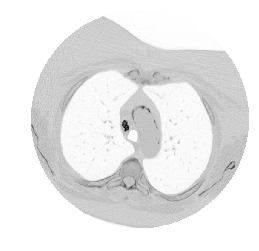

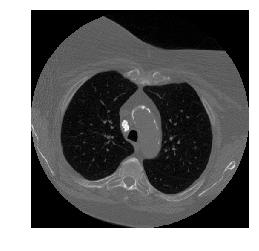

In [20]:
img = dcm.pixel_array
img[img == -2000] = 0

plt.axis('off')
plt.imshow(img)
plt.show()

plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

In [21]:
def dicom_to_image(filename):
    dcm = dicom.read_file(filename)
    img = dcm.pixel_array
    img[img == -2000] = 0
    return img

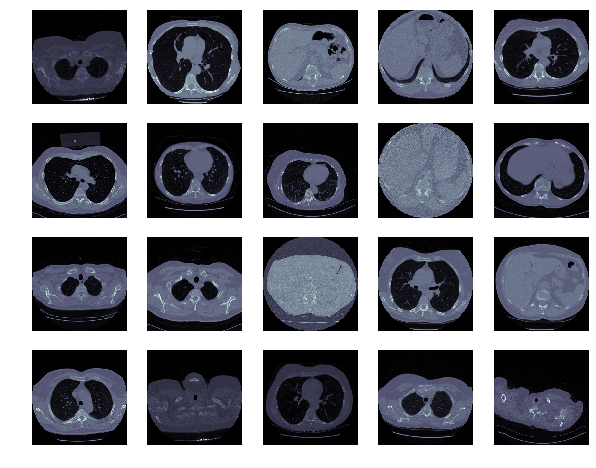

In [22]:
files = glob.glob('NEW_input/sample_images/*/*.dcm')

f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

In [23]:
def get_slice_location(dcm):
    return float(dcm[0x0020, 0x1041].value)

# Returns a list of images for that patient_id, in ascending order of Slice Location
def load_patient(patient_id):
    files = glob.glob('NEW_input/sample_images/{}/*.dcm'.format(patient_id))
    imgs = {}
    for f in files:
        dcm = dicom.read_file(f)
        img = dcm.pixel_array
        img[img == -2000] = 0
        sl = get_slice_location(dcm)
        imgs[sl] = img
        
    # Not a very elegant way to do this
    sorted_imgs = [x[1] for x in sorted(imgs.items(), key=lambda x: x[0])]
    return sorted_imgs

In [24]:
pat = load_patient('0a38e7597ca26f9374f8ea2770ba870d')


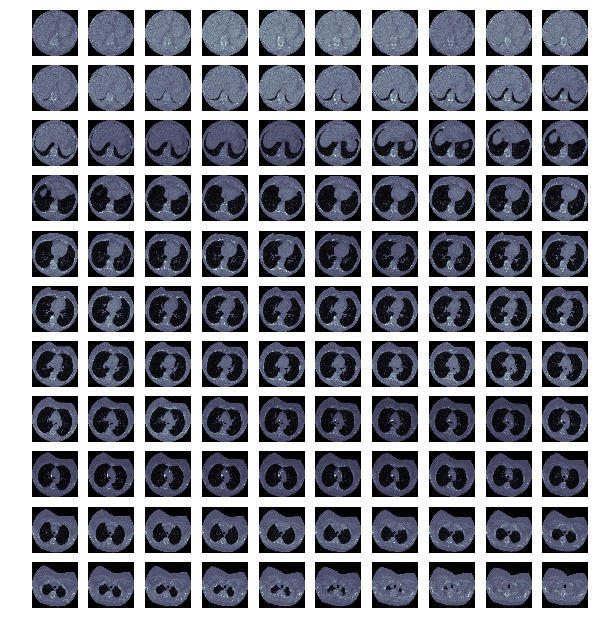

In [25]:
f, plots = plt.subplots(11, 10, sharex='all', sharey='all', figsize=(10, 11))
# matplotlib is drunk
#plt.title('Sorted Slices of Patient 0a38e7597ca26f9374f8ea2770ba870d - No cancer')
for i in range(110):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

### Sorted Slices of Patient 0acbebb8d463b4b9ca88cf38431aac69 - Cancer


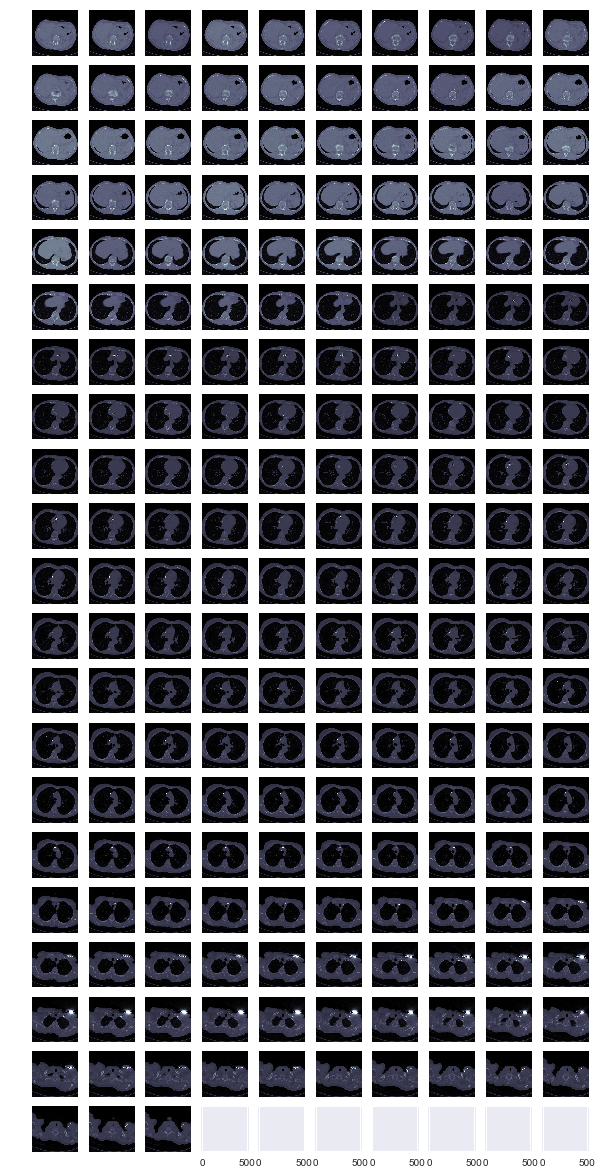

In [26]:
pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')
f, plots = plt.subplots(21, 10, sharex='all', sharey='all', figsize=(10, 21))
for i in range(203):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

In [27]:
# This function takes in a single frame from the DICOM and returns a single frame in RGB format.
def normalise(img):
    normed = (img / 14).astype(np.uint8) # Magic number, scaling to create int between 0 and 255
    img2 = np.zeros([*img.shape, 3], dtype=np.uint8)
    for i in range(3):
        img2[:, :, i] = normed
    return img2

In [28]:
npat = [normalise(p) for p in pat]

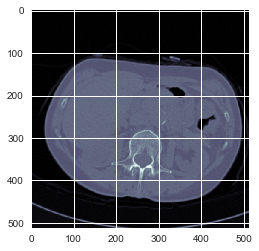

In [29]:
pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')

import matplotlib.animation as animation
def animate(pat, gifname):
    # Based on @Zombie's code
    fig = plt.figure()
    anim = plt.imshow(pat[0], cmap=plt.cm.bone)
    def update(i):
        anim.set_array(pat[i])
        return anim,
    
    a = animation.FuncAnimation(fig, update, frames=range(len(pat)), interval=50, blit=True)
#    a.save(gifname, writer='imagemagick')
    
animate(pat, 'test.gif')

In [ ]:
#brew install ffmpeg